# Курсовая работа 
# Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn

In [110]:
#В первую очередь загрузим бибилотеки
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [111]:
# Дальше загрузим тренировочные данные и посмотрим на них
df_train = pd.read_csv('train.csv')
df_train.head(20)
# Сразу видно что данные не однородны(есть катерориальные и количественные значения), а так же имеются пропуски

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


# EDA - Exploratory Data Analysis (разведочный анализ данных)

In [112]:
#Выполним 3 шага EDA в Data Science
#-Рассмотрим распределение таргета
#-Рассмотрим распределение фичей
#-Рассмотрим графики влияния фичей на таргет

In [113]:
# Для построения графиков нам необходимо подгрузить бибилотеки
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
#Рассмотрим целевую переменную
target_mean = round(df_train['Price'].mean(), 2)
target_median = df_train['Price'].median()
target_mode = df_train['Price'].mode()[0]

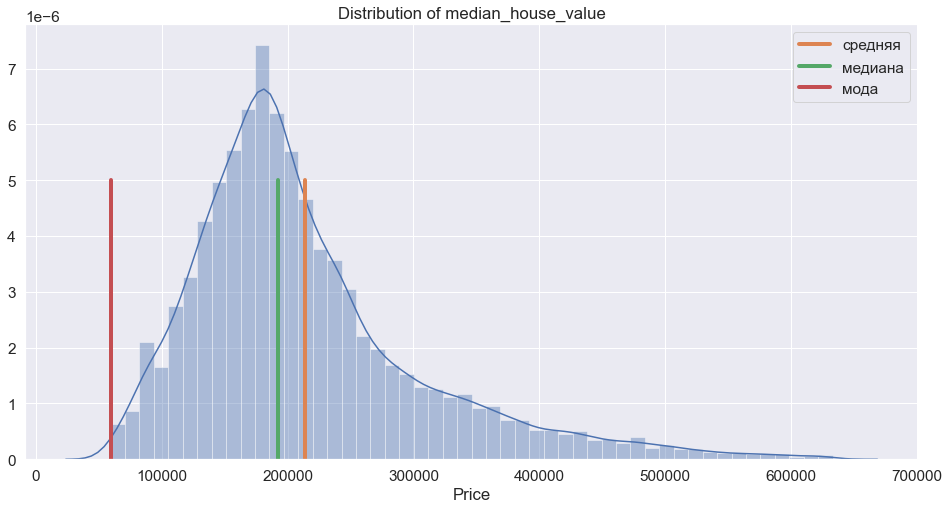

In [115]:
plt.figure(figsize = (16, 8))

sns.distplot(df_train['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='средняя',  linewidth=4)
plt.plot([target_median] * 10, y, label='медиана',  linewidth=4)
plt.plot([target_mode] * 10, y, label='мода', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

# На графике видно что цена плавно возрастает к 200 000 затем плано убывает, средняя и медиана находятся в райное 200 000
# мода смещена влево, возможно из-за округления некоторых данных

In [116]:
#Теперь проведем анализ фичей, начнем с пропущенных значений
df_train.isna().sum()
# LifeSquare и Healthcare_1 имеют пропуски причем у Healthcare_1 пропущенно более половины значений 

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

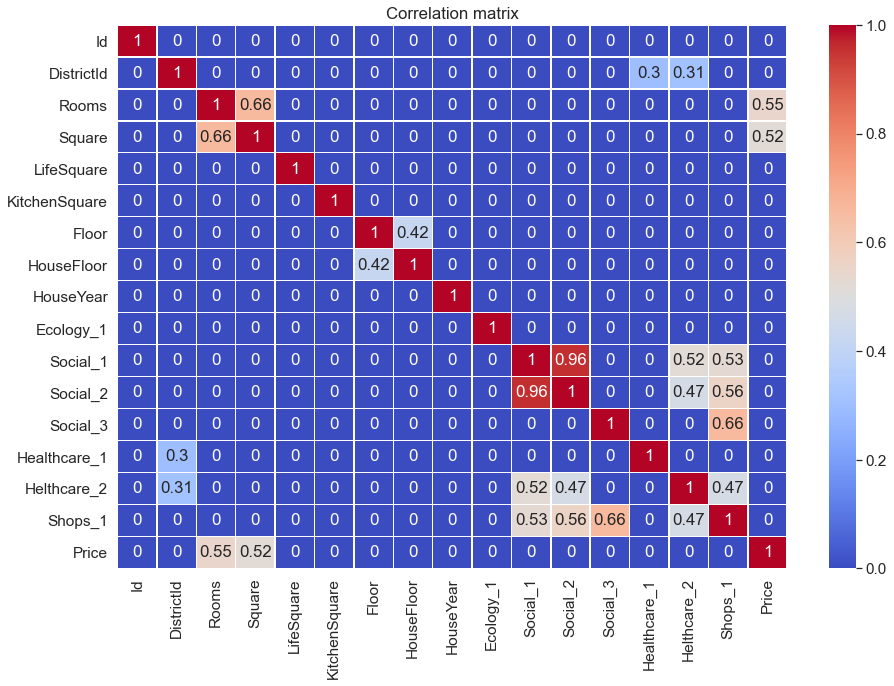

In [117]:
# На матрице корреляции проверим нет ли взаимосвязей между фичами
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df_train.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

# Из матрицы видно, что есть связи между площадью и количеством комнат, этажностью дома и этажом квартиры, 
# Social_1 и Social_2 почти одно и тоже, Healthcare_1 имеет слабую кореляцию с DistrictId 
# LifeSquare и KitchenSquare не корелирует ни с одним другим признаком, хотя исходя из логики должна быть зваисимость с Rooms и Square

In [118]:
# Теперь разобьем данные на смысловые подгруппы и будем работать с ними
# Начнём с площадей и количества комнат. Ясно что они должны коррелировать друг с другом
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


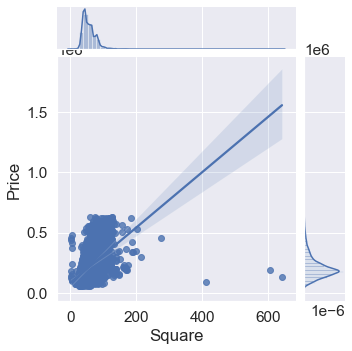

In [119]:
# Количество комнат равное 19 и 0 это странные значения которые нужно заменить. Тоже самое касается площадей близких к нулю
# Давайте взглянем как эти данные влияют на целевую переменную
grid = sns.jointplot(df_train['Square'], df_train['Price'], kind='reg')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)

plt.show()
# Ага, имеются явныйе выбросы!

In [120]:
# Смотрим что не так с этими данными
df_train.sort_values(by = 'Square', ascending = False)[:4]
# Двухкомнатная квартира площадью 641 метр квадратный? За цену обычной духкомнатной площадью в десять раз меньше?
# Похоже что кто-то просто поставил не там запятую. Это нужно исправить.

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9229,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
726,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
7010,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
1906,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666


In [121]:
# Так-же нужно исправить случаи где жилая площадь больше общей площади, может из перепутали местами?
# И количество комнат - 19? Это явно что-то не то

# Если площадь больше 350 то скорее всего запитая поставлена не там делим площадь на 10
df_train.loc[df_train['Square'] >= 350, 'Square'] =  df_train['Square']/10
# Если площадь меньше 10 скорее всего снова проблемы с запятой умножаем на 10
df_train.loc[df_train['Square'] <= 10, 'Square'] =  df_train['Square']*10
# Жилая площадь площадь не может быть больше общей площади
df_train.loc[df_train['LifeSquare'] > df_train['Square'], 'LifeSquare'] = df_train['Square'] - 10
# Если количество комнат больше 5 значит это явная ощибка которую нужно измтенить в зависимости от площади квартиры
df_train.loc[(df_train['Rooms'] >= 5) & (df_train['Square'] < 50.0), 'Rooms'] =  1
df_train.loc[(df_train['Rooms'] >= 5) & (df_train['Square'] > 50.0) & (df_train['Square'] < 75.0), 'Rooms'] =  2
# Если количество комнат равно 0 нужно проделать тоже самое
df_train.loc[(df_train['Rooms'] == 0) & (df_train['Square'] < 50.0), 'Rooms'] =  1
df_train.loc[(df_train['Rooms'] == 0) & (df_train['Square'] > 50.0) & (df_train['Square'] < 75.0), 'Rooms'] =  2
df_train.loc[(df_train['Rooms'] == 0) & (df_train['Square'] > 75.0) & (df_train['Square'] < 100.0), 'Rooms'] =  3
df_train.loc[(df_train['Rooms'] == 0) & (df_train['Square'] > 100.0), 'Rooms'] =  4

In [122]:
# Теперь заменим пропуски в LifeSquare и исправим размеры кухонь
median_lf = df_train['LifeSquare'].median()
median_sq = df_train['Square'].median()
delta = median_sq/median_lf
df_train['LifeSquare'].fillna(df_train['Square']/delta, inplace=True)
df_train.loc[df_train['KitchenSquare'] < 5, 'KitchenSquare'] =  df_train['Square'] - df_train['LifeSquare']
df_train.loc[(df_train['KitchenSquare'] + df_train['LifeSquare']) > df_train['Square'], 'KitchenSquare'] =  df_train['Square'] - df_train['LifeSquare']

In [123]:
# С площадьми закончили теперь посмотрим на этажность здания и год постройки
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.887700,56.206777,35.697609,11.840573,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.810897,19.081143,16.095599,10.400224,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,1.000000,11.368588,0.370619,0.002943,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.784346,24.112941,6.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.889149,9.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.889736,44.350383,12.210673,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,5.000000,275.645284,233.949309,125.041526,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


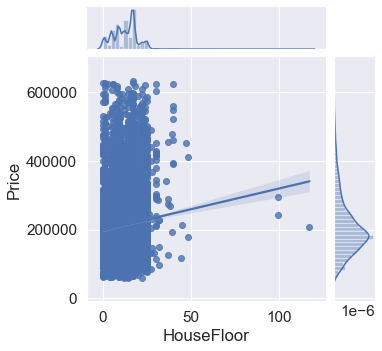

In [124]:
# 117 этажный дом? Такого не может быть и 0 этажей это тоже врядли.
# Давайте взглянем на эти данные поближе
grid = sns.jointplot(df_train['HouseFloor'], df_train['Price'], kind='reg')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)

plt.show()
# Ага, имеются явныйе выбросы!

In [125]:
# Смотрим что не так с этими данными
df_train.sort_values(by = 'HouseFloor', ascending = False)[:3]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1678,78,30,2.0,65.773749,55.773749,10.000000,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.370520
746,9300,74,2.0,71.747869,61.747869,9.000000,5,99.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,243329.912579
4657,10806,5,1.0,51.944587,48.709601,3.234986,6,99.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,296127.115515


In [126]:
#В советское время здания не строились выше 32 этажей значит
df_train.loc[(df_train['HouseFloor'] > 32) & (df_train['HouseYear'] < 2000), 'HouseFloor'] =  df_train['HouseFloor'] - df_train['HouseFloor']%100 

In [127]:
# Посмотрим сколько домов с 0 этажами
df_train[df_train['HouseFloor'] == 0]

# Очень много и такое ощущение что все они построены в 1977 году

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
24,4717,27,1.0,44.203947,27.227006,16.976940,2,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,135466.559958
152,12947,53,2.0,56.023342,34.507052,21.516290,14,0.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B,247074.564832
159,13146,74,1.0,46.449711,28.610264,17.839447,6,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,168705.450148
186,12174,62,1.0,44.954880,27.689537,17.265343,8,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,133773.301722
229,15661,45,3.0,81.094922,49.949657,31.145265,15,0.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,442472.456032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9889,629,27,1.0,42.936724,26.446472,16.490251,2,0.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,129674.841139
9931,15686,1,1.0,47.402412,29.197071,18.205341,14,0.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,174740.301224
9940,4711,6,1.0,41.224118,25.391609,15.832509,8,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,125612.639104
9950,5383,48,3.0,98.994909,60.974986,38.019923,3,0.0,1977,0.041125,B,B,46,9515,5,NaN,1,10,B,418817.004446


In [128]:
# Проверим так ли это
df_train[(df_train['HouseFloor'] == 0) & (df_train['HouseYear'] != 1977)]

# Нет. Имются здания после 2010 г.

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
303,13113,27,1.0,37.805231,2.228592,11.000000,6,0.0,2015,0.017647,B,B,2,469,0,NaN,0,0,B,137402.092529
909,5575,27,1.0,41.941912,4.437475,37.504437,10,0.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,113350.022423
1829,4378,27,3.0,106.958871,0.641822,106.317049,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
3565,12446,45,2.0,66.204483,60.538230,5.666253,16,0.0,2015,0.195781,B,B,23,5212,6,NaN,3,2,B,365391.037940
4303,4000,74,2.0,73.059245,3.769436,69.289809,10,0.0,2016,0.075779,B,B,6,1437,3,NaN,0,2,B,224526.414201
4685,10521,38,3.0,104.211396,94.211396,10.000000,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
5178,14564,34,4.0,97.524848,97.046136,0.478713,20,0.0,2016,0.069753,B,B,53,13670,4,NaN,1,11,B,401035.038716
5492,2517,45,2.0,63.326746,53.326746,10.000000,4,0.0,2018,0.195781,B,B,23,5212,6,NaN,3,2,B,416710.241706
5736,13231,27,1.0,44.163968,34.163968,10.000000,19,0.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,140427.433764
5861,12828,27,1.0,40.288833,1.487210,38.801623,11,0.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,95779.608687


In [129]:
# Значит мы можем поделить на два поколения советское и постсоветское
df_train.loc[(df_train['HouseFloor'] == 0) & (df_train['HouseYear'] < 2000), 'HouseFloor'] =  17
df_train.loc[(df_train['HouseFloor'] == 0) & (df_train['HouseYear'] > 2000), 'HouseFloor'] =  24

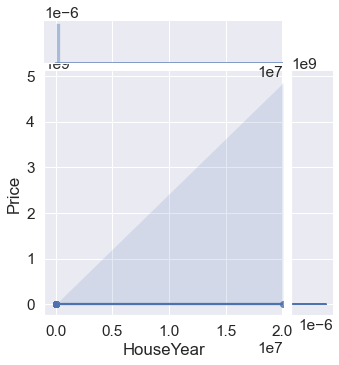

In [130]:
#Посмотрим на странные значение HouseYear
grid = sns.jointplot(df_train['HouseYear'], df_train['Price'], kind='reg')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)

plt.show()
# Снова выбросы!

In [131]:
# Смотрим что не так с этими данными
df_train.sort_values(by = 'HouseYear', ascending = False)[:1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9163,10814,109,1.0,37.26507,20.239714,9.0,9,12.0,20052011,0.13633,B,B,30,6141,10,262.0,3,6,B,254084.534396


In [132]:
#Кто-то записал год начала и окончания строительства чтобы избежать подобных ошибок нам нужно отсечь последнии 4 цыфры
df_train.loc[df_train['HouseYear'] > 10000000, 'HouseYear'] =  df_train['HouseYear']%10000

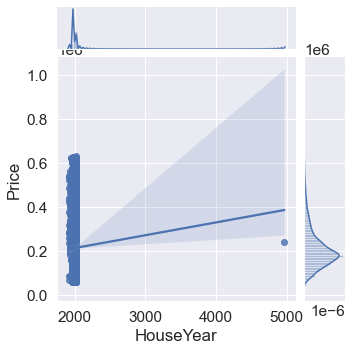

In [133]:
#Проверяем
grid = sns.jointplot(df_train['HouseYear'], df_train['Price'], kind='reg')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)

plt.show()
# Снова что-то не то!

In [134]:
df_train.sort_values(by = 'HouseYear', ascending = False)[:1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8828,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [135]:
# Год 4968 - похоже перепутали с 1968. Нужно исправить и подобные ошибки
df_train.loc[(df_train['HouseYear'] > 2020) & (df_train['HouseYear']%1000 < 20), 'HouseYear'] =  df_train['HouseYear']%1000 + 2000
df_train.loc[(df_train['HouseYear'] > 2020) & (df_train['HouseYear']%1000 > 20), 'HouseYear'] =  df_train['HouseYear']%1000 + 1000

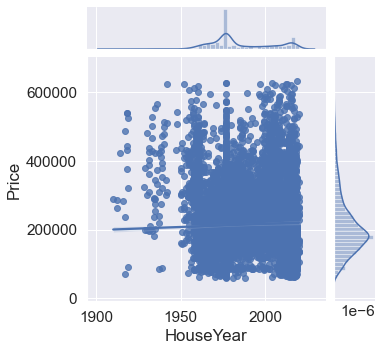

In [136]:
#Проверяем
grid = sns.jointplot(df_train['HouseYear'], df_train['Price'], kind='reg')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)

plt.show()
# Отлично!

In [137]:
#Теперь займёмся категориальными переменными. Для начала переведем поле Id в строковый тим, чтобы оно не сбивало модель с толку 
df_train['Id'] = df_train['Id'].astype(str)
df_train['Id'].dtype

dtype('O')

In [138]:
#Рассмотрим какие значения принимают Ecology_2, Ecology_3 и Shops_2
df_train['Shops_2'].value_counts()
#Только А и В

B    9175
A     825
Name: Shops_2, dtype: int64

In [139]:
#Значит мы можем заменить их на 0 и 1
binary_to_numbers = {'A': 0, 'B': 1}
df_train['Ecology_2'] = df_train['Ecology_2'].replace(binary_to_numbers)
df_train['Ecology_3'] = df_train['Ecology_3'].replace(binary_to_numbers)
df_train['Shops_2'] = df_train['Shops_2'].replace(binary_to_numbers)

In [140]:
#DistrictId хоть и является числом но по факту это категориальная переменная
df_train['DistrictId'].value_counts()
#Самый большой район 27 дальше идёт 1, 23, 6, 9 уже меньше и есть районы с 1 наблюдением

27     851
1      652
23     565
6      511
9      294
      ... 
199      1
205      1
174      1
209      1
207      1
Name: DistrictId, Length: 205, dtype: int64

In [141]:
#Значит мы можем заменить цифры на буквы, а затем проделать обратное как мы это делали выше
df_train.loc[(df_train['DistrictId'] != 27)|(df_train['DistrictId'] != 1)|(df_train['DistrictId'] != 23)|(df_train['DistrictId'] != 6)|(df_train['DistrictId'] != 9), 'DistrictId'] =  'I'
df_train.loc[df_train['DistrictId'] == 27, 'DistrictId'] =  'A'
df_train.loc[df_train['DistrictId'] == 1, 'DistrictId'] =  'B'
df_train.loc[df_train['DistrictId'] == 23, 'DistrictId'] =  'C'
df_train.loc[df_train['DistrictId'] == 6, 'DistrictId'] =  'D'
df_train.loc[df_train['DistrictId'] == 9, 'DistrictId'] =  'E'

In [142]:
#Меняем на числовые занчения согласно размеру района
binary_to_numbers = {'A': 6, 'B': 5, 'C': 4, 'D': 3, 'E': 2, 'I': 1}
df_train['DistrictId'] = df_train['DistrictId'].replace(binary_to_numbers)

In [143]:
#Ну а теперь удалим Healthcare_1 так как востанавливать половину данных достаточно сложно
if 'Healthcare_1' in df_train.columns:
           df_train.drop('Healthcare_1', axis=1, inplace=True)

In [144]:
#Проведем отбор признаков
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Social_1','Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Ecology_2', 'Ecology_3', 'Shops_2']
target_name = 'Price'

In [145]:
#Разобьем на тестовые и тренеровочные датасеты
X = df_train[feature_names]
y = df_train[target_name]

In [146]:
# Подгружаем библиотеку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [147]:
# И проверим что покажет наша модель на линейной регрессии для этого подгрузим библиотеку
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [148]:
# Создадим функцию для подробоной визуализации
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

Train R2:	0.514
Test R2:	0.524


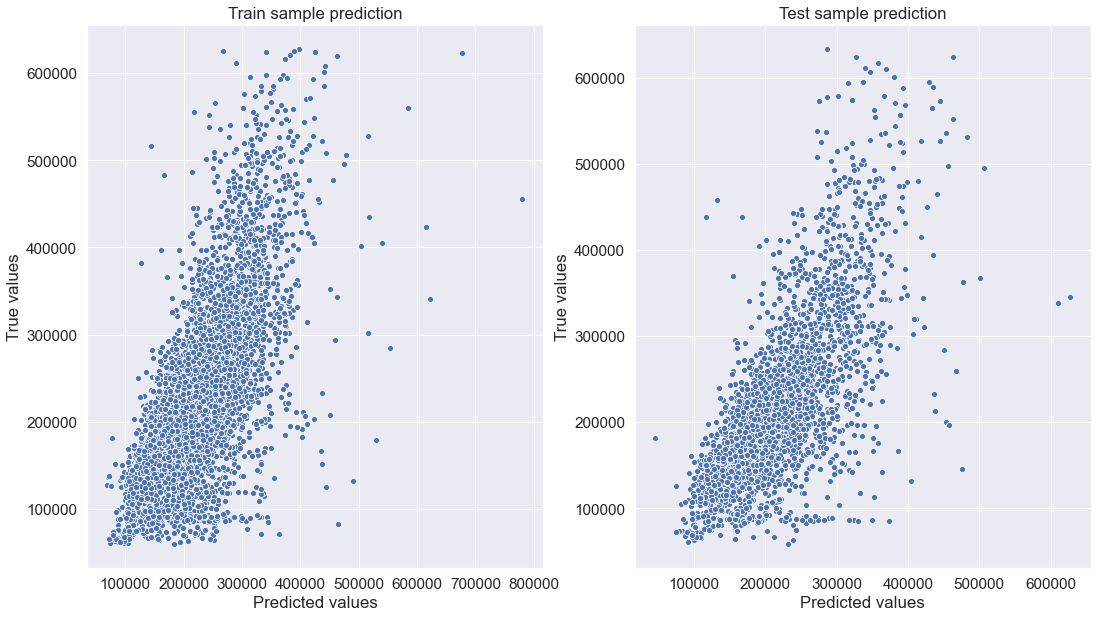

In [149]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_preds = lr_model.predict(X_train)
y_test_preds = lr_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)
# 0.524 так себе результат... Попробуем другую модель

Train R2:	0.932
Test R2:	0.731


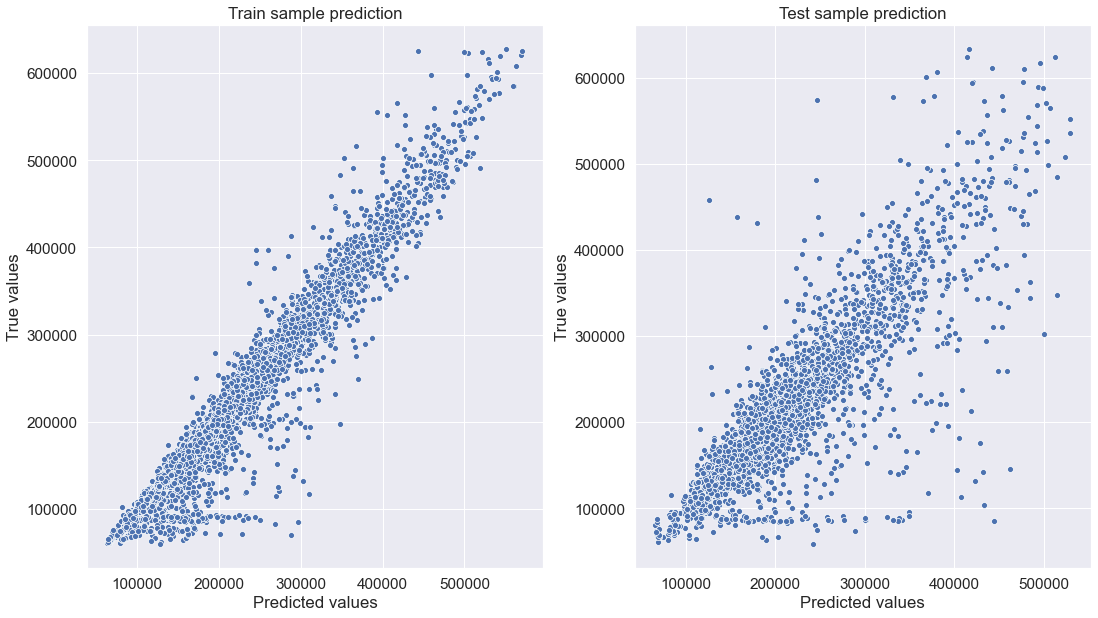

In [150]:
# Например случайный лес
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=60, # глубина дерева  
                                 min_samples_leaf=2, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42,
                                 n_estimators=300  # кол-во деревьев
                                )
                                 
rf_model.fit(X_train, y_train)
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)
# 0.731 не тесте не так уж и плохо

Train R2:	0.756
Test R2:	0.624


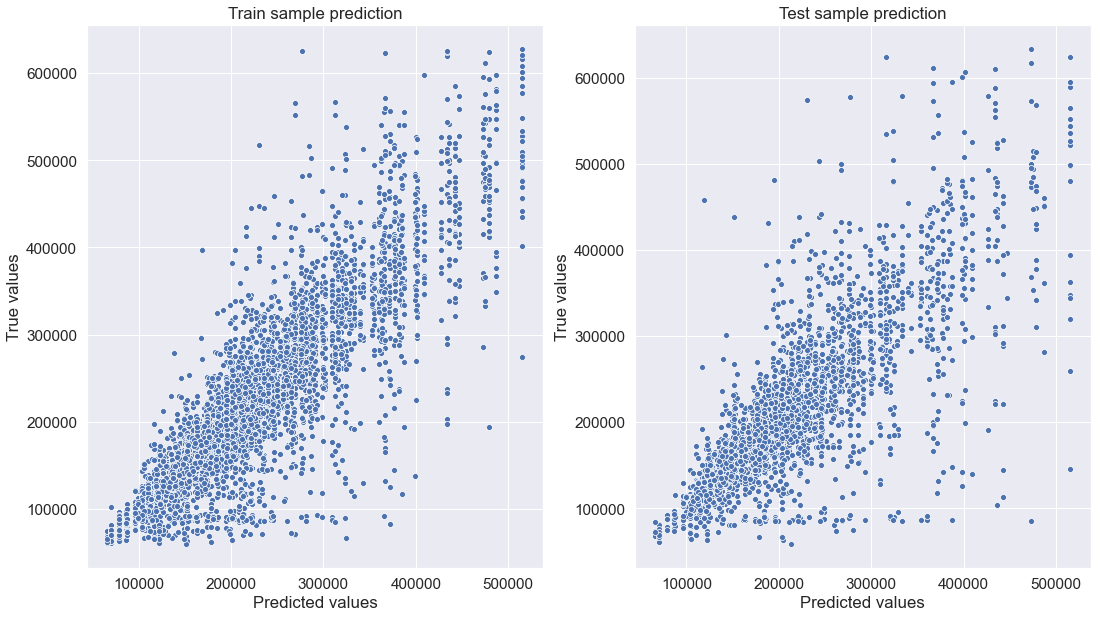

In [151]:
# Посмотрим деревья решений
from sklearn.tree import DecisionTreeRegressor, plot_tree
dt_model = DecisionTreeRegressor(criterion='mse', 
                                 max_depth=40, # глубина дерева  
                                 min_samples_leaf=15, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42)
dt_model.fit(X_train, y_train)

y_train_preds = dt_model.predict(X_train)
y_test_preds = dt_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)
# Ну тоже так себе результат

In [152]:
# Ладно, что есть то есть будем пробовать на реальных данных, но для начала оформим все вышесделанное в класс 
# чтобы не обрабатывать данные снова
class DataPreprocessing:
    """Подготовка исходных данных"""
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms, Square, KitchenSquare, LifeSquare
        X.loc[X['Square'] >= 350, 'Square'] =  X['Square']/10
        X.loc[X['Square'] <= 10, 'Square'] =  X['Square']*10
        X.loc[X['LifeSquare'] > X['Square'], 'LifeSquare'] = X['Square'] - 10
        X.loc[(df_train['Rooms'] >= 5) & (X['Square'] < 50.0), 'Rooms'] =  1
        X.loc[(df_train['Rooms'] >= 5) & (X['Square'] > 50.0) & (X['Square'] < 75.0), 'Rooms'] =  2
        X.loc[(df_train['Rooms'] == 0) & (X['Square'] < 50.0), 'Rooms'] =  1
        X.loc[(df_train['Rooms'] == 0) & (X['Square'] > 50.0) & (X['Square'] < 75.0), 'Rooms'] =  2
        X.loc[(df_train['Rooms'] == 0) & (X['Square'] > 75.0) & (X['Square'] < 100.0), 'Rooms'] =  3
        X.loc[(df_train['Rooms'] == 0) & (X['Square'] > 100.0), 'Rooms'] =  4
        cmedian_lf = X['LifeSquare'].median()
        median_sq = X['Square'].median()
        delta = median_sq/median_lf
        X['LifeSquare'].fillna(X['Square']/delta, inplace=True)
        X.loc[(X['Square'] - X['LifeSquare']) < 10, 'LifeSquare'] = X['LifeSquare'] - 10
        X.loc[X['KitchenSquare'] < 5, 'KitchenSquare'] =  X['Square'] - X['LifeSquare']
        X.loc[(X['KitchenSquare'] + X['LifeSquare']) > X['Square'], 'KitchenSquare'] =  X['Square'] - X['LifeSquare']
        
        # HouseFloor, Floor, HouseYear
        X.loc[(X['HouseFloor'] > 32) & (X['HouseYear'] < 2000), 'HouseFloor'] =  X['HouseFloor'] - X['HouseFloor']%100 
        X.loc[(X['HouseFloor'] == 0) & (X['HouseYear'] < 2000), 'HouseFloor'] =  17
        X.loc[(X['HouseFloor'] == 0) & (X['HouseYear'] > 2000), 'HouseFloor'] =  24
        X.loc[X['HouseYear'] > 10000000, 'HouseYear'] =  X['HouseYear']%10000
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
        
        binary_to_numbers = {'A': 0, 'B': 1}

        X['Ecology_2'] = X['Ecology_2'].replace(binary_to_numbers)
        X['Ecology_3'] = X['Ecology_3'].replace(binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].replace(binary_to_numbers)
        
        X.loc[(X['DistrictId'] != 27)|(X['DistrictId'] != 1)|(X['DistrictId'] != 23)|(X['DistrictId'] != 6)|(X['DistrictId'] != 9), 'DistrictId'] =  'I'
        X.loc[X['DistrictId'] == 27, 'DistrictId'] =  'A'
        X.loc[X['DistrictId'] == 1, 'DistrictId'] =  'B'
        X.loc[X['DistrictId'] == 23, 'DistrictId'] =  'C'
        X.loc[X['DistrictId'] == 6, 'DistrictId'] =  'D'
        X.loc[X['DistrictId'] == 9, 'DistrictId'] =  'E'
        
        #Меняем на числовые занчения согласно размеру района
        binary_to_numbers = {'A': 6, 'B': 5, 'C': 4, 'D': 3, 'E': 2, 'I': 1}
        X['DistrictId'] = X['DistrictId'].replace(binary_to_numbers)
        
        return X

In [153]:
# Загружаем тестовые данные
test_df = pd.read_csv('test.csv')
test_df = test_df[feature_names]

In [154]:
# Подготавливаем тестовые данные
preprocessor = DataPreprocessing()
test_df = preprocessor.transform(test_df)

# Используем случайный лес так как он показал наилучшие результаты
rf_prediction = rf_model.predict(test_df)

In [155]:
# Приводим результаты к необходимому виду для проверки на Kaggle
submit = pd.read_csv('test.csv')
feature_names = ['Id']
prediction = submit[feature_names]
prediction['Price'] = rf_prediction
prediction

,Id,Price
0,4567,156738.051884
1,5925,117334.061928
2,960,137955.743818
3,3848,129363.752873
4,746,209371.772447
...,...,...
4995,10379,175759.542026
4996,16138,366251.256194
4997,3912,146114.906640
4998,5722,190553.015805


In [156]:
# Сохраняем результаты 
prediction.to_csv('rf_submit.csv', index=False)